In [333]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
%matplotlib inline
# plt.rcParams["animation.html"]='jshtml'

###  He Normal

In [334]:
def he_normal(X,y,hidden):
    W1=np.random.normal(loc=0,scale=np.sqrt(2/(X.shape[1])),size=(X.shape[1],hidden[0]))
    b1=0
    W2=np.random.normal(loc=0,scale=np.sqrt(2/(hidden[0])),size=(hidden[0],len(np.unique(y))))
    b2=0
    return W1,b1,W2,b2

### He Uniform

In [335]:
def he_uniform(X,y,hidden):
    W1=np.random.uniform(low=-np.sqrt(6/(X.shape[1])),high=np.sqrt(6/(X.shape[1])),size=(X.shape[1],hidden[0]))
    b1=0
    W2=np.random.uniform(low=-np.sqrt(6/hidden[0]),high=np.sqrt(6/hidden[0]),size=(hidden[0],len(np.unique(y))))
    b2=0
    return W1,b1,W2,b2

### Glorat Normal

In [336]:
def glorat_normal(X,y,hidden):
    W1=np.random.normal(loc=0,scale=np.sqrt(2/(X.shape[1]+hidden[0])),size=(X.shape[1],hidden[0]))
    b1=0
    W2=np.random.normal(loc=0,scale=np.sqrt(2/(hidden[0]+len(np.unique(y)))),size=(hidden[0],len(np.unique(y))))
    b2=0
    return W1,b1,W2,b2

### Glorat Uniform

In [337]:
def glorat_uniform(X,y,hidden):
    W1=np.random.uniform(low=-np.sqrt(6/(X.shape[1]+hidden[0])),high=np.sqrt(6/(X.shape[1])),size=(X.shape[1],hidden[0]))
    b1=0
    W2=np.random.uniform(low=-np.sqrt(6/(hidden[0]+len(np.unique(y)))),high=np.sqrt(6/(hidden[0]+len(np.unique(y)))),size=(hidden[0],len(np.unique(y))))
    b2=0
    return W1,b1,W2,b2

# Simple Neural Network

### Sigmoid

In [338]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [339]:
def derivative_igmoid (Z):
    return Z *(1-Z)

### ReLU

In [340]:
def ReLU(Z):
    return np.maximum(0,Z)

In [341]:
def derivative_ReLU(Z):
    return  np.where(Z>0,1,0)

### Softmax

In [342]:
def softmax(Z):
    expA=np.exp(Z-np.max(Z))
    return expA/expA.sum(axis=1,keepdims=True)

### One Hot Encoder

In [343]:
def one_hoty(y):
    z=np.zeros((len(y),len(np.unique(y))),dtype=int)
    for i in range(len(y)):
        z[i,y[i]]=1
    return z

### Forward Probagation

> Note: If we want we can change the activation function manually

In [372]:
def forward_probagation(X,W1,b1,W2,b2):
    #Input Layer
    Z1=np.dot(X,W1)+b1
    
    # Hidden Layer
    Activation1=sigmoid(Z1)
    
    Z2=np.dot(Activation1,W2)+b2
    
    # Output layer
    YP=softmax(Z2)
    
    return Z1,Activation1,Z2,YP

### Backward Probagation

In [373]:
def Back_probagation(X,y,W2,A1,YP,derivative_act):
    dW2=((y-YP)).T.dot(A1)
    db2=((y-YP)).sum(axis=0)
    dW1=(((y-YP).dot(W2.T)*(derivative_act)))
    dW1=X.T.dot(dW1)
    db1=(((y-YP).dot(W2.T)*derivative_act)).sum(axis=0)
    return dW2,db2,dW1,db1

### Weight Updation

In [374]:
def update_weights(W1,b1,W2,b2,dW2,db2,dW1,db1,lr):
    W1=W1+(lr*dW1)
    b1=b1+(lr*db1)
    W2=W2+(lr*dW2.T)
    b2=b2+(lr*db2)
    return W1,b1,W2,b2

### Prediction

In [375]:
def predict1(X,W1,b1,W2,b2):
    _,_,_,YP=forward_probagation(X,W1,b1,W2,b2)
    res=np.zeros(YP.shape[0],dtype=int)
    for i in range(YP.shape[0]):
        if YP[i,0]>YP[i,1]:
            res[i]=0
        else:
            res[i]=1
    return res

### Training 

> Note: Here we need to change the derivative of the activation function manually

### we can change the initialization method here

In [382]:
def trainining(X,y,n_hidden,lr,iterration,plot=False):

# We can see the step by step transformation by setting plot = True    
    
    if plot:
        fig=plt.figure(1,(13,5))
        ax1=fig.add_subplot(141)
        ax2=fig.add_subplot(142)
        ax3=fig.add_subplot(143)
        ax4=fig.add_subplot(144)
    
# Weight initialization

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

    W1,b1,W2,b2=he_normal(X,y,n_hidden)
    
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    
# Converting y into one hot vector
    y1=one_hoty(y)
    
    for i in range(iterration):
        
# Forward pass
        Z1,A1,Z2,YP=forward_probagation(X,W1,b1,W2,b2)
        
# Computing Cost
        cost=-(np.sum(y1*(np.log(YP))+((1-y1)*(np.log(1-YP)))))

# Ploting the transformation
        if plot:
            ax1.scatter(X[:,0],X[:,1],c=y)
            ax2.scatter(A1[:,0],A1[:,1],c=y)
            ax3.scatter(Z2[:,0],Z2[:,1],c=y)
            ax4.scatter(YP[:,0],YP[:,1],c=y)
            fig.canvas.draw()

# Computing gradient of activation function             >>>>>> (" Need to change when we change the activation function")
        derivative_activation=derivative_sigmoid(A1)
    
# Backward function
        dW2,db2,dW1,db1=Back_probagation(X,y1,W2,A1,YP,derivative_activation)
    
# Updating Weight
        W1,b1,W2,b2=update_weights(W1,b1,W2,b2,dW2,db2,dW1,db1,lr)
        
#     print(cost)
    return W1,b1,W2,b2

### Preparing the data

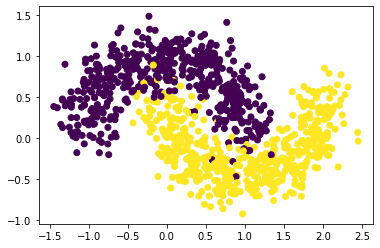

In [388]:
from sklearn.datasets import make_moons

X,y=make_moons(1000,noise=0.2)

# Creating DF
data=pd.DataFrame(data=X,columns=[f'X{i}' for i in range(X.shape[1])])
data["y"]=y
plt.scatter(X[:,0],X[:,1],c=y)

In [389]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Training the model

In [390]:
W1,b1,W2,b2=trainining(X_train,y_train,[10],1e-3,10000)

### Testing the model

In [391]:
y_predicted=predict1(X,W1,b1,W2,b2)

### Accuracy

In [392]:
sum(y_predicted==y)/len(y)

0.971